### 2021155015 叶茂林

## 实验一 Gym以及经典案例介绍

## 1 OpenAI Gym介绍
### 1.1 简介

OpenAI Gym是一款用于研发和比较强化学习算法的工具包，它支持训练**智能体**（agent）做任何事——从行走到玩游戏。

OpenAI Gym与其他数值计算库兼容，如tensorflow、theano库。现主要支持python语言，以后支持其他语言。

OpenAI Gym包括两个部分：
1. 包含一个开源的测试问题集，“问题”在强化学习中指**环境**（environment），可以用于自己的强化学习算法开发，这些环境有共享的接口，允许用户设计通用的算法，例如Atari、CarPole等环境。
2. OpenAI Gym服务提供一个站点和API，允许用户对自己的训练的算法进行性能比较。

\
我们先用一个简单的例子测试一下吧！（运行下方的代码会弹出一个窗口，中途不要手动关闭，可能会导致内核中断）

In [ ]:
import gym
env = gym.make('CartPole-v0') # 创建一个环境
env.reset() # 重新初始化环境
for _ in range(500):
    env.render()  # 渲染
    env.step(env.action_space.sample()) # 采取一个随机动作
env.close()
# 忽略下方的警告

C:\Users\wangxu\AppData\Roaming\Python\Python38\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


这是强化学习中经典的车杆（CartPole）模型，如果想测试其他环境，可以把上述代码中的`CartPole-v0`替换掉，比如`MountainCar-v0`,`MsPacman-v0`（需要Atari支持包） 或者`Hopper-v1`（需要MuJoCo支持包），所有的环境都继承于 Env 基类。

下面介绍Gym的几个常用的函数方法和对象：

### 1.2 函数和对象介绍

#### 1.2.1 reset()方法
在强化学习算法中，智能体需要一次次地进行尝试，累积经验，然后从经验中学到好的动作。一次尝试我们称之为一条轨迹或一个episode。每次尝试都要到达终止状态，一次尝试结束后，智能体需要从头开始，这就需要智能体具有重新初始化的功能。方法reset()就是这个作用。

函数的输入输出：无。

reset()方法的源代码：
```
def reset():
    self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,))  # 利用均匀随机分布初试化环境的状态
    self.steps_beyond_done = None  # 设置当前步数为None
    return np.array(self.state)  # 返回环境的初始化状态
```

#### 1.2.2 render(mode='human')方法
render()方法在这里扮演图像引擎的角色。一个仿真环境必不可少的两部分是物理引擎和图像引擎。物理引擎模拟环境中物体的运动规律；图像引擎用来显示环境中的物体图像。

对于强化学习算法本身而言，可以不调用该函数，但是为了便于直观显示当前环境中物体的状态，图像引擎还是有必要的。另外，加入图像引擎可以方便我们调试代码。

函数的输入：

- 该函数的参数`mode`有两个选择：`human`和`rgb_array`，其中`human`是默认参数

- human: render to the current display or terminal and
  return nothing. Usually for human consumption.
- rgb_array: Return an numpy.ndarray with shape (x, y, 3),
  representing RGB values for an x-by-y pixel image, suitable for turning into a video.

函数的输出：
- 如果mode为human，则没有输出，如果mode为rgb_array，输出为一个numpy图像矩阵（见上文介绍）

也就是说，使用render('rgb_array')方法可以渲染出环境某个状态的图像，以下方代码为例：

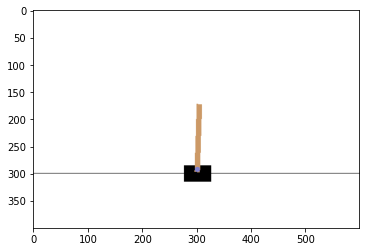

In [ ]:
import matplotlib.pyplot as plt
env = gym.make('CartPole-v0')  # 创建一个环境
env.reset()                    # 重新初始化环境
img = env.render('rgb_array')  # 输入rgb_array参数，渲染一张图片
plt.imshow(img)
plt.show()
env.close()

#### 1.2.3 step(a)方法
该函数在仿真器中扮演物理引擎的角色。即用动作与环境进行一次交互，获得新的环境信息。

函数的输入：
- 动作 a

函数的输出：
- 观测（其实就是下一步状态 s）
- 奖励 r
- 是否终止 done
- 调试项（在车杆环境中是一个空字典）

最后用一个简单的demo再次让大家体会上面介绍的函数的作用。

In [ ]:
import gym
import time
env = gym.make('CartPole-v0')   #创造环境
observation = env.reset()       #初始化环境，observation为环境状态
count = 0
for t in range(100):
    action = env.action_space.sample()  #随机采样动作
    print(action)
    observation, reward, done, info = env.step(action)  #与环境交互，获得下一步的观测，如果杆倾斜到一定角度，则终止
    if done:             # 终止时跳出循环
        break
    env.render()         #绘制场景
    count += 1
    time.sleep(0.5)      #每次等待0.2s
print("尝试的步数：%d" %(count))             #打印该次尝试的步数
env.close()

0
1
1
1
1
0
1
0
1
1
1
1
1
尝试的步数：12


In [ ]:
action

1

#### 1.2.4 观测（Observations）
观测是上方介绍的step()方法的其中一个输出，它是一个基于环境的对象，代表我们对环境的观测。

例如：来自相机的像素数据、机器人的关节角度和关节速度，或棋盘游戏中的棋盘状态。可以理解为强化学习定义中的**状态**（state）

#### 1.2.5 空间（Space）
在上方的实例代码中，我们是从环境的动作空间中随机地进行采样。但其实动作空间是有明确的定义的，每个环境（environment）都包含一个动作空间（action_space）和观测空间（observation_space），它们都是Space类的属性。

In [ ]:
import gym
env = gym.make('CartPole-v0')
print(type(env.action_space))
print(env.action_space)
print(type(env.observation_space))
print(env.observation_space)

<class 'gym.spaces.discrete.Discrete'>
Discrete(2)
<class 'gym.spaces.box.Box'>
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


`Discrete`表示该空间是离散的，空间中动作（或状态）的取值范围是一个固定的非负数（在CartPole中合法的action为0或1）

`Box`的空间是n维连续的，空间中动作（或状态）有一定的取值范围（在CartPole中合法的状态是一个4维向量）

可以使用以下语句查看Box中向量的范围

In [ ]:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


### 1.3 其他环境介绍
Gym从简单到复杂，包含了许多经典的仿真环境，主要包含了经典控制、算法、2D机器人、3D机器人、文字游戏、Atari视频游戏等等。（详见参考阅读）

在Gym注册表中也有大量的其他环境，这些环境共享一个通用接口，同时进行版本控制以方便比较，使用以下代码列出安装中可用的环境：

（需要安装完整的Gym库才能全部使用）

以上输出所有`EnvSpec`对象，每一个对象都是一个特定任务的环境，它们会定义所需要的所有参数，包括要运行的试验数和最大步数。

例如：`EnvSpec（Hopper-v1）`定义了一个环境，其目标是让2D模拟机器人跳跃；`EnvSpec(Go9x9-v0)`定义了9×9棋盘上的围棋游戏

如果想把自己定义的环境添加进来，只需要在程序一开始时注册自己的环境预加载即可，之后就能通过gym.make()调用。注册自己环境的代码可以参考：
https://github.com/openai/gym/blob/master/gym/envs/__init__.py

<mark><big><font color='Black'>**同学们需要注意的是，我们在实验一和实验二的大部分内容中都不会使用到Gym库，我们会先尝试着自己编写强化学习环境，到了后面较为复杂的环境，我们将直接调用Gym库。**</font></big><mark>

## 2 多臂老虎机
### 2.1 简介
强化学习是一种**试错型学习**。多臂老虎机可以看作简化版的强化学习问题，简化在于其不存在状态信息，只有动作和奖励。其中，多臂老虎机中的**探索与利用**（exploration vs. exploitation）问题一直以来都是一个特别经典的问题，理解它能够帮助我们学习强化学习。

### 2.2 问题介绍
#### 2.2.1 问题定义
在多臂老虎机（multi-armed bandit，MAB）问题中，有一个拥有$K$根拉杆的老虎机，拉动每一根拉杆都对应一个关于奖励的概率分布$R$。我们每次拉动其中一根拉杆，就可以从该拉杆对应的奖励概率分布中获得一个奖励$r$。我们在各根拉杆的奖励概率分布未知的情况下，从头开始尝试，目标是在操作$T$次拉杆后获得尽可能高的累积奖励。由于奖励的概率分布是未知的，因此我们需要在“探索拉杆的获奖概率”和“根据经验选择获奖最多的拉杆”中进行权衡（也就是探索与利用的权衡）。**采用怎样的策略才能使获得的累积奖励最高？**

<img src="https://hrl.boyuai.com/static/640.8908144b.png" style="zoom:80%;" />

上图出自《动手学强化学习》https://hrl.boyuai.com/static/640.8908144b.png

#### 2.2.2 相关定义描述
##### 动作和奖励
多臂老虎机问题可以表示为一个元组$<\mathcal{A},\mathcal{R}>$，其中：
- $\mathcal{A}$为动作集合，其中某一个动作表示拉动对应的拉杆。若多臂老虎机有$K$根杠杆，则动作空间集合为$\{a_1, a_2,...,a_{k}\}$，我们用$a_t \in \mathcal{A}$表示$t$时刻的一个动作。
- $\mathcal{R}$为奖励的概率分布，拉动每一根拉杆的动作$a$都对应一个奖励概率分布$\mathcal{R}(r\mid a)$，不同拉杆（老虎机）的奖励分布通常是不同的

假设每个时间步只能拉动一个拉杆，多臂老虎机的目标为最大化一段时间步$T$内的累积奖励：$max\sum_{t=1}^{T} r_t$，其中$r_t \sim \mathcal{R}(\bullet \mid a_t)$，$a_t$表示在第$t$时间步拉动某一拉杆的动作，$r_t$表示动作$a_t$获得的奖励。

##### 期望奖励
对于每一个动作$a$，定义其期望奖励为$Q(a)=\mathbb{E}_{r\sim \mathcal{R}(\bullet \mid a)}[r]$。于是，应该至少存在一根杠杆（也可以理解为存在一个动作，在本节中，动作就是拉动杠杆），它的期望奖励不小于拉动其他任意一根杠杆，将该杠杆（或称为动作）的期望奖励称为**最优期望奖励**，表示为：$Q^{*}=max_{a\in \mathcal{A}}Q(a)$。

##### 懊悔
为了更加直观地观察拉动某一根杠杆的期望奖励和最优期望奖励的差距，在此引入**懊悔**（regret）概念（懊悔并不参与老虎机模型的计算，只在结果中进行可视化展示）。

懊悔的定义：拉动最优拉杆的动作的期望奖励 和 拉动当前拉杆的动作$a$的期望奖励 之差，即$Rg(a)=Q^* - Q(a)$.

**累积懊悔**的定义：操作$T$次拉杆后累积的懊悔总量，对于一次完整的$T$个动作序列$\{a_1,a_2,...,a_T\}$，累积懊悔为$\sigma_R=\sum_{t=1}^{T}Rg(a_t)$

多臂老虎机的目标是最大化累积奖励，等价于最小化累积懊悔

#### 2.2.3 估计期望奖励
我们无法直接获得某根拉杆（或某个动作）的期望奖励，所以我们需要对其进行估计，以知道拉动哪一根拉杆能获得更高的奖励。

由于只拉动一次拉杆获得的奖励存在随机性，所以需要多次拉动某一根杠杆，然后计算其获得奖励的期望，以此估计该杆（或动作）的期望奖励$Q(a)$。其算法流程如下：
- 对于$\forall a \in \mathcal{A}$，初始化计数器$N(a)=0$和期望奖励估值$\hat{Q}(a)=0$
- **for** $t=1\rightarrow T$ **do**
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;根据某个策略（下文介绍）选取某根拉杆，该动作记为$a_t$
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;得到奖励$r_t$
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;更新计数器：$N(a_t)=N(a_{t-1})+1$
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;更新期望奖励估值：$\hat{Q}(a_t)=\hat{Q}(a_{t-1})+\frac{1}{N(a_t)}[r_t - \hat{Q}(a_{t-1})]$
- **end for**

> 更新估值的方式采用了增量式更新，等价于求均值，时间复杂度由 $O(n)$减少到$O(1)$：
$$
\begin{aligned}
\hat{Q}_k & =\frac{1}{k} \sum_{i=1}^k r_i \\
& =\frac{1}{k}\left(r_k+\sum_{i=1}^{k-1} r_i\right) \\
& =\frac{1}{k}\left(r_k+(k-1) \hat{Q}_{k-1}\right) \\
& =\frac{1}{k}\left(r_k+k \hat{Q}_{k-1}-\hat{Q}_{k-1}\right) \\
& =\hat{Q}_{k-1}+\frac{1}{k}\left(r_k-\hat{Q}_{k-1}\right)
\end{aligned}
$$

下面先编写一段代码实现一个拉杆数为10的多臂老虎机。

其中拉动每根拉杆的奖励服从**伯努利分布**（Bernoulli distribution），即每次拉下拉杆有$p$的概率获得奖励$1$，有$1-p$的概率获得奖励$0$

In [7]:
# 导入需要使用的库,其中numpy是支持数组和矩阵运算的科学计算库,而matplotlib是绘图库
import numpy as np
import matplotlib.pyplot as plt


class BernoulliBandit:
    """ 伯努利多臂老虎机,输入K表示拉杆个数 """
    def __init__(self, K):                      # 定义多臂老虎机的真实价值，但是在实际的尝试中并不知道真实价值
        self.probs = np.random.uniform(size=K)  # 随机生成K个0～1的数,作为拉动每根拉杆的获奖概率
        self.best_idx = np.argmax(self.probs)  # 获奖概率最大的拉杆
        self.best_prob = self.probs[self.best_idx]  # 最大的获奖概率
        self.K = K

    def step(self, k):
        # 当玩家选择了k号拉杆后,根据拉动该老虎机的k号拉杆获得奖励的概率返回1（获奖）或0（未获奖）
        if np.random.rand() < self.probs[k]:
            return 1
        else:
            return 0


np.random.seed(1)  # 设定随机种子,使实验具有可重复性
K = 10
bandit_10_arm = BernoulliBandit(K)
print("随机生成了一个%d臂伯努利老虎机" % K)
print("获奖概率最大的拉杆为%d号,其获奖概率为%.4f" %
      (bandit_10_arm.best_idx, bandit_10_arm.best_prob))
print(bandit_10_arm.probs)
# 随机生成了一个10臂伯努利老虎机
# 获奖概率最大的拉杆为1号,其获奖概率为0.7203

随机生成了一个10臂伯努利老虎机
获奖概率最大的拉杆为1号,其获奖概率为0.7203
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]


接下来使用一个Solver基础类来实现多臂老虎机的求解方案。将实现以下功能：根据策略选择动作、根据动作获得奖励、更新期望奖励估值、更新累积懊悔（用于可视化）、更新计数。

在下面的代码中，将**根据策略选择动作**、**根据动作获取奖励**和**更新期望奖励估值**放在`run_one_step`函数中，由每个继承Solver的子类具体实现（不同的算法对应不同的子类，在子类中重写这个函数）。

In [3]:
class Solver:
    """ 多臂老虎机算法基本框架 """
    def __init__(self, bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)  # 用于记录每根拉杆的尝试次数
        self.regret = 0.  # 当前步的累积懊悔
        self.actions = []  # 维护一个列表,记录每一步的动作
        self.regrets = []  # 维护一个列表,记录每一步的累积懊悔

    def update_regret(self, k):
        # 更新累积懊悔并保存,k为本次动作选择的拉杆的编号
        self.regret += self.bandit.best_prob - self.bandit.probs[k]  # 可以直接这么算是因为每次拉拉杆有p的概率获得1奖励，有1-p的概率获得0奖励，0的部分被省略了
        self.regrets.append(self.regret)

    # 根据策略选择动作、根据动作获取奖励、更新期望奖励估值,由每个具体的策略算法实现
    def run_one_step(self):
        # 返回当前动作选择哪一根拉杆
        raise NotImplementedError

    def run(self, num_steps):
        # 运行一定次数,num_steps为总运行次数
        for _ in range(num_steps):
            k = self.run_one_step()
            self.counts[k] += 1       # 更新计数
            self.actions.append(k)
            self.update_regret(k)     # 更新累积懊悔

### 2.3 探索和利用平衡
在上方的代码中，还没有一个策略告诉我们在哪种情况下应该采取哪个动作（即拉动哪根拉杆，拉杆数=动作数)，所以接下来我们将设计一个策略。

>例如，一个最简单的策略就是一直采取某一个动作，但这就非常依赖运气的好坏。如果运气绝佳，可能拉动的刚好是那根能获得最大期望奖励的拉杆，即最优拉杆；但如果运气很糟糕，获得的就有可能是最小的期望奖励。

在多臂老虎机问题中，一个经典的问题就是**探索与利用**的平衡问题。**探索**（exploration）是指尝试拉动更多的拉杆，这根拉杆不一定会获得最大的奖励，但这种方案能够摸清楚所有拉杆的获奖情况。

>例如，对于一个 10 臂老虎机，我们要把所有的拉杆都拉动一下才知道哪根拉杆可能获得最大的奖励。

**利用**（exploitation）是指拉动已知期望奖励最大的那根拉杆，由于已知的信息仅仅来自有限次的交互观测，所以当前的最优拉杆不一定是全局最优的。

>例如，对于一个 10 臂老虎机，我们只拉动过其中 3 根拉杆，接下来就一直拉动这 3 根拉杆中期望奖励最大的那根拉杆，但很有可能期望奖励最大的拉杆在剩下的 7 根当中，即使我们对 10 根拉杆各自都尝试了 20 次，发现 5 号拉杆的经验期望奖励是最高的，但仍然存在着微小的概率—另一根 6 号拉杆的真实期望奖励是比 5 号拉杆更高的。

于是在多臂老虎机问题中，设计策略时就需要平衡探索和利用的次数，使得累积奖励最大化。一个比较常用的思路是在开始时做比较多的探索，在对每根拉杆都有比较准确的估计后，再进行利用，针对期望奖励估计最高的拉杆获取奖励。目前已有一些比较经典的算法来解决这个问题，例如：$\epsilon$-贪婪算法、上置信界算法和汤普森采样算法等，我们接下来将分别介绍这几种算法（在强化学习中，根据算法求出需要执行的动作，一般称这个算法为**策略**）。

### 2.4 不同策略解决多臂老虎机问题
#### 2.4.1 $\epsilon$-贪婪算法
完全贪婪算法在每一时刻采取期望奖励估值最大的动作（拉动拉杆），这种算法是纯粹的利用，而没有探索。

通常我们会对完全贪婪算法进行一些修改，使其能探索其他不同的拉杆。其中比较经典的一种方法为$\epsilon$-贪婪（$\epsilon$-Greedy）算法。$\epsilon$-贪婪算法在完全贪婪算法的基础上添加了噪声，每次以概率$1-\epsilon$选择以往经验中期望奖励估计最大的那根拉杆（利用），并有$\epsilon$的概率在所有的拉杆中随机选择一根拉杆（探索），公式如下：

$$
a_{t}=
\begin{cases}
\underset{a\in \mathbf{\mathcal{A}}}{argmax} \hat{Q}(a)，采样概率：1-\epsilon \\
从\mathcal{A}中随机选择，采样概率：\epsilon
\end{cases}
$$

接下来我们编写代码来实现一个$\epsilon$-贪婪算法，并用其解决上方定义的`BernoulliBandit`多臂老虎机的问题。设置$K=10$(臂的数目)，$\epsilon=0.01$，$T=5000$(终止的时间步)

In [4]:
class EpsilonGreedy(Solver):
    """ epsilon贪婪算法,继承Solver类 """
    def __init__(self, bandit, epsilon=0.01, init_prob=1.0):
        super(EpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon
        #初始化拉动所有拉杆的期望奖励估值，就是公式中的Qhat
        self.estimates = np.array([init_prob] * self.bandit.K)  # array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

    def run_one_step(self):
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)  # 随机选择一根拉杆
        else:
            k = np.argmax(self.estimates)  # 选择期望奖励估值最大的拉杆
        r = self.bandit.step(k)  # 得到本次动作的奖励
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r -self.estimates[k])
        return k

为了更加直观地展示，可以把每一时间步的累积函数绘制出来。于是我们定义了以下绘图函数，方便之后调用。

In [5]:
def plot_results(solvers, solver_names):
    """生成累积懊悔随时间变化的图像。输入solvers是一个列表,列表中的每个元素是一种特定的策略。
    而solver_names也是一个列表,存储对应的每个策略的名称"""
    for idx, solver in enumerate(solvers):
        time_list = range(len(solver.regrets))
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    plt.xlabel('Time steps')
    plt.ylabel('Cumulative regrets')
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    plt.legend()
    plt.show()

下面开始正式的$\epsilon$-贪婪算法在10臂赌博机上的实验：

epsilon-贪婪算法的累积懊悔为： 25.526630933945313


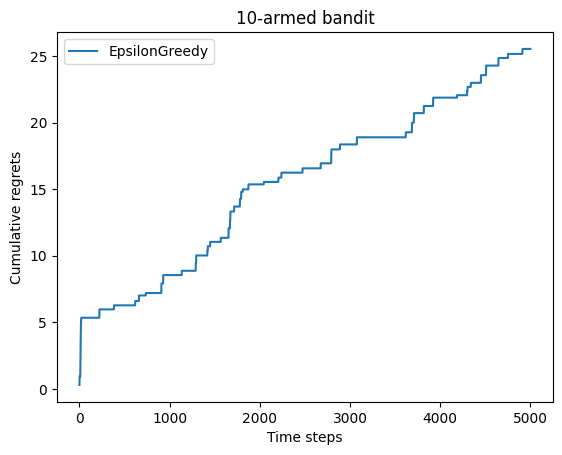

In [8]:
np.random.seed(1)
epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon=0.01, init_prob=1.0)
epsilon_greedy_solver.run(5000)
print('epsilon-贪婪算法的累积懊悔为：', epsilon_greedy_solver.regret)
plot_results([epsilon_greedy_solver], ["EpsilonGreedy"])

# epsilon-贪婪算法的累积懊悔为：25.526630933945313

经过上面的实验可以发现，累积懊悔曲线呈阶梯状上升。结合代码进行分析可知，**在平台期时，累积懊悔没有增加，表示算法找到了期望奖励最高的拉杆；在上升期时，表示算法进行了随机探索，并且估计最大期望奖励所在的拉杆是错误的，所以导致算法一直选择非最大期望奖励的那根拉杆。**


如果同学们对上方代码的$\epsilon$参数以及随机数种子进行了修改和尝试（初始化参数`init_prob`不变），可以发现：
   - 在$\epsilon$参数不变时，改变随机数种子，算法的累积懊悔会天差地别。
   - 而在固定随机数种子为$1$时，将$\epsilon$参数修改至$0$，其效果甚至比$\epsilon=0.01$时要好得多，这难道说明完全贪婪算法比$\epsilon$-贪婪算法要好？
   
如何解释这样的现象呢？
    
对于第一个问题，是非常容易解释的，因为随机数组合的不同，导致算法在某些随机数组合中会陷入“局部最优”中，无法发现期望奖励最高的拉杆。

对于第二个问题，则由同学们进行回答（提示：**事实上，有没有探索非常取决于期望奖励估值的初始化**）。
    
<big><font color='red'>**问题1（简答题）：在前文的介绍中，完全贪婪算法在每一时刻采取期望奖励估值最大的动作，不进行任何随机性探索。为什么在本例中却进行了搜索，且效果甚至比$\epsilon$-贪婪算法要好？（言之有理即可）**</font></big>

答：

在固定随机数种子为1的情况下，将ϵ参数修改至0，可能导致算法在初始化时选择了一个相对较优的动作。这个动作可能是由于初始估值较高，或者是由于随机性的影响。然后，在后续的学习过程中，由于完全贪婪算法始终选择当前估计的最优动作，算法能够一直保持在这个优秀的动作上，而不受到随机性的影响。

这种情况下，尽管算法是完全贪婪的，但由于初始化条件的特殊性，它在整个学习过程中都能表现得比ϵ-贪婪算法更好。这并不是因为完全贪婪算法进行了搜索，而是因为在这个特殊的初始化条件下，它能够从一开始就选择一个相对较优的动作，并在学习过程中一直坚持这个选择。

<big><font color='red'>**问题2（编程题）：在上方的代码中我们进行了$\epsilon=0.01$时的实验，且仅进行了一次实验。现在请你设计一个实验，尝试不同的$\epsilon$参数对算法性能的影响，具体要求如下：**</font></big>
- <big><font color='red'>**尝试参数$\epsilon=[0.01,0.1,0.25,0.5]$**</font></big>
- <big><font color='red'>**每个参数进行200次实验，使用0~199的随机数种子，每个实验进行1000步（目的是多次实验消除偶然性）**</font></big>
- <big><font color='red'>**利用上方定义的函数进行算法实验和结果可视化（使用`plot_results`函数画图）**</font></big>
- <big><font color='red'>**最后输出每个参数对应的累积懊悔和画出的折线图（为保证输出一致，均使用10臂赌博机，估计期望奖励的初始化使用默认参数，最终答案保留两位小数）**</font></big>  

epsilon= 0.01 累积懊悔为：81.30


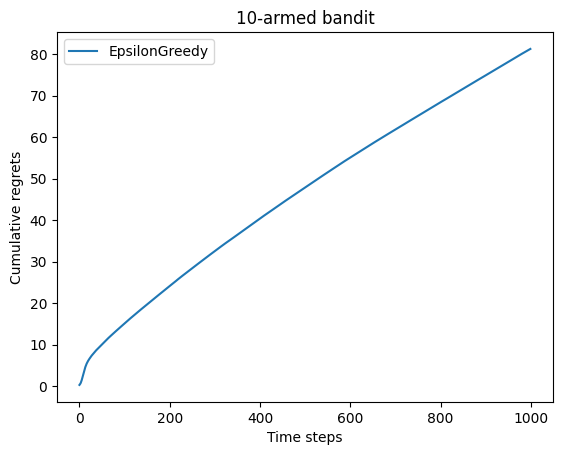


epsilon= 0.1 累积懊悔为：75.64


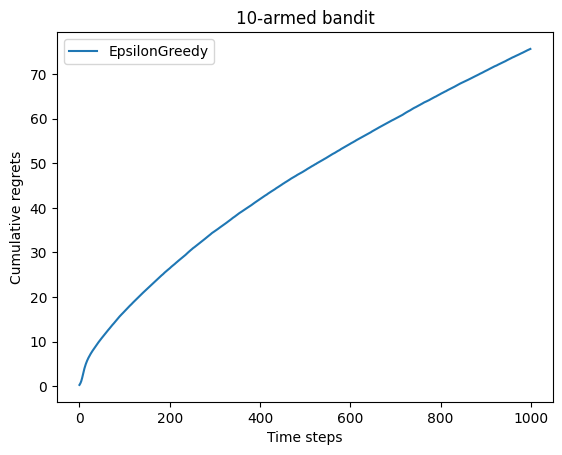


epsilon= 0.25 累积懊悔为：119.84


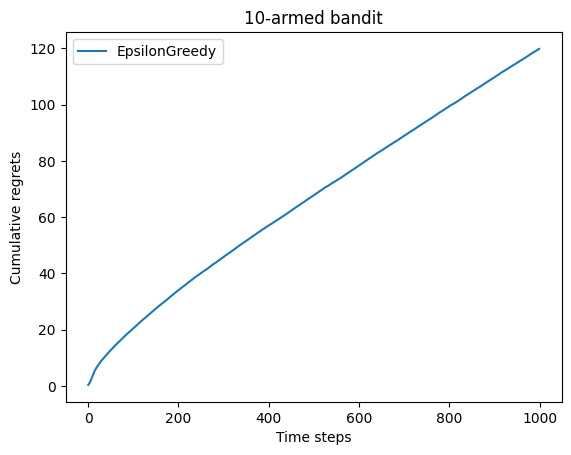


epsilon= 0.5 累积懊悔为：210.63


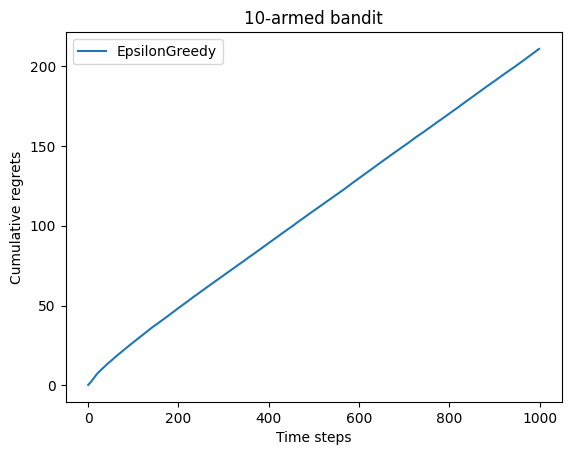

In [15]:
# 答题区域：
epsilons=[0.01,0.1,0.25,0.5]
for epsilon in epsilons:
  epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon=epsilon, init_prob=1.0)
  epsilon_greedy_solver.regrets=[0 for i in range(1000)]
  for seed in range(200):
    np.random.seed(seed)
    epsilon_greedy_solver_one = EpsilonGreedy(bandit_10_arm, epsilon=epsilon, init_prob=1.0)
    epsilon_greedy_solver_one.run(1000)
    epsilon_greedy_solver.regret+=epsilon_greedy_solver_one.regret
    epsilon_greedy_solver.regrets=[x+y for x,y in zip(epsilon_greedy_solver.regrets,epsilon_greedy_solver_one.regrets)]
  epsilon_greedy_solver.regret/=200
  epsilon_greedy_solver.regrets=[x/200 for x in epsilon_greedy_solver.regrets]
  print('epsilon=',epsilon,'累积懊悔为：{:.2f}'.format(epsilon_greedy_solver.regret))
  plot_results([epsilon_greedy_solver], ["EpsilonGreedy"])
  print()

通过上方的练习我们可以发现，在本次实验的环境设置下，当$\epsilon=0.01$时，算法的结果要优于$\epsilon=0.1、0.25、0.5$的情况，结合问题1的答案，我们可以分析：$\epsilon=0.01$相较于其他情况探索的概率更低，在找到最优拉杆后会更加地稳定，所以累积懊悔是最低的。

#### 2.4.2 $\epsilon$-贪婪算法改进
随着探索次数的不断增加，我们对各个动作的奖励估计得越来越准，此时我们就没必要继续花大力气进行探索。所以$\epsilon$-贪婪算法的一种改进方式是，令$\epsilon$随时间步递减，即探索的概率将会不断降低。但$\epsilon$不会在有限的步数衰减至0，因为基于有限步数观测的完全贪婪算法仍然是一个局部信息的贪婪算法，永远距离最优解有一个固定的距离。

接下来我们实现一个衰减形式为反比例衰减的$\epsilon$-贪婪算法，即$\epsilon_{t}=\frac{1}{t}$

epsilon值衰减的贪婪算法的累积懊悔为： 10.114334931260183


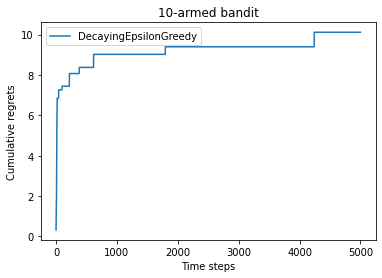

In [ ]:
class DecayingEpsilonGreedy(Solver):
    """ epsilon值随时间衰减的epsilon-贪婪算法,继承Solver类 """
    def __init__(self, bandit, init_prob=1.0):
        super(DecayingEpsilonGreedy, self).__init__(bandit)
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.total_count = 0

    def run_one_step(self):
        self.total_count += 1
        if np.random.random() < 1 / self.total_count:  # epsilon值随时间衰减
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimates)

        r = self.bandit.step(k)
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r -
                                                          self.estimates[k])

        return k


np.random.seed(1)
decaying_epsilon_greedy_solver = DecayingEpsilonGreedy(bandit_10_arm)
decaying_epsilon_greedy_solver.run(5000)
print('epsilon值衰减的贪婪算法的累积懊悔为：', decaying_epsilon_greedy_solver.regret)
plot_results([decaying_epsilon_greedy_solver], ["DecayingEpsilonGreedy"])

# epsilon值衰减的贪婪算法的累积懊悔为：10.114334931260183

从实验结果图中可以发现，随时间做反比例衰减的$\epsilon$-贪婪算法能够使累积懊悔与时间步的关系变成**次线性**的（有更长的平台期），这明显优于固定$\epsilon$值的$\epsilon$-贪婪算法。

#### 2.4.3 上置信界算法
$\epsilon$-贪婪算法虽然会尝试选择非最大期望的动作，但是其选择往往是随机的，没有依据的。所以一个有效的方法是：在选择非贪心动作的时候，最好是根据这些动作潜力（不确定性）来探索新的动作，因为往往不确定的动作更有可能有更高的价值。

**上置信界**（upper confidence bound，UCB）算法可以理解为对每一个动作都有两个评价指标，一个评价指标是期望收益$Q_{t}(a)$，另一个评价指标是“探索价值”，用于表示某个动作的不确定性。综合这两个评价指标，可以对每一个动作进行打分：

$$
评分=期望收益+不确定性度量
$$

具体地可以使用如下公式进行动作的选择（其中的数学推导部分涉及霍夫丁不等式，详情可以查看下方的参考阅读）。

$$
A_{t}\doteq \underset{a}{argmax} \Big[\hat{Q}_{t}(a)+c\sqrt{\frac{\ln t}{2N_{t}(a)+1}}\Big]
$$

其中 $t$ 表示步数（step），每选择一次动作加一，$N_{t}(a)$表示在$t$步之前，动作$a$被选择的次数，$\hat{Q_{t}}(a)$表示动作$a$的估计期望收益。

下面，我们将编写代码来实现UCB算法，并且仍然使用多臂老虎机环境进行测试：

上置信界算法的累积懊悔为： 89.4086503322641


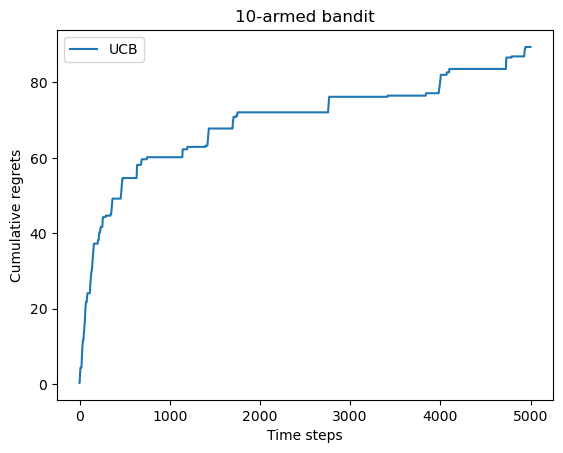

In [ ]:
class UCB(Solver):
    """ UCB算法,继承Solver类 """
    def __init__(self, bandit, coef, init_prob=1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.coef = coef

    def run_one_step(self):
        self.total_count += 1
        ucb = self.estimates + self.coef * np.sqrt(
            np.log(self.total_count) / (2 * self.counts + 1))  # 计算上置信界
        k = np.argmax(ucb)  # 选出上置信界最大的拉杆
        r = self.bandit.step(k)
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r - self.estimates[k])
        return k


np.random.seed(1)
coef = 1  # 控制不确定性比重的系数
UCB_solver = UCB(bandit_10_arm, coef)
UCB_solver.run(5000)
print('上置信界算法的累积懊悔为：', UCB_solver.regret)
plot_results([UCB_solver], ["UCB"])
# epsilon值衰减的贪婪算法的累积懊悔为： 89.4086503322641

#### 2.4.4 汤普森采样算法
在理解汤普森采样算法之前，先要了解$\beta$分布。

$\beta$分布是一种连续型概率密度分布，表示为 $x\sim \beta(a,b)$ ，由两个参数 $a,b$ 决定，称为形状参数。

$\beta$分布的定义域为$(0,1)$，一般用于**建模伯努利试验事件成功的概率**的概率分布。

>对于硬币或者骰子这样的简单实验，我们事先能很准确地掌握系统成功的概率

>然而通常情况下，系统成功的概率是未知的，但是根据频率学派的观点，我们可以通过频率来估计概率

>为了测试系统的成功概率，我们做n次试验，统计成功的次数k，于是很直观地就可以估计出概率。然而由于系统成功的概率是未知的，这个公式计算出的只是系统成功概率的最佳估计，也就是说实际上也可能为其它的值，只是为其它的值的概率较小。所以这也是一个随机变量，它符合$\beta$分布，其取值范围为0到1

$\beta$分布可以看作一个概率的概率分布，当不知道一个东西的具体概率是多少的时候，$\beta$分布可以给出所有概率出现的可能性的大小

通常$\beta$分布的参数 $a$ 表示成功的次数， $b$ 表示失败的次数

假设老虎机的每根拉杆的期望奖励都服从$\beta$分布，则从所有的老虎机中采样出期望奖励，选择期望奖励最大的那根拉杆，最后更新$\beta$分布的参数。具体而言，若某个拉杆被选择了 $k$ 次，其中 $m_{1}$ 次奖励为 $1$ ，$m_{2}$ 次奖励为 $0$ ，则该拉杆服从参数为$(m_{1}+1,m_{2}+1)$ 的$\beta$分布。

下面，我们编写代码来实现汤普森采样算法，并且仍然使用多臂老虎机环境进行测试：

汤普森采样算法的累积懊悔为： 57.19161964443925


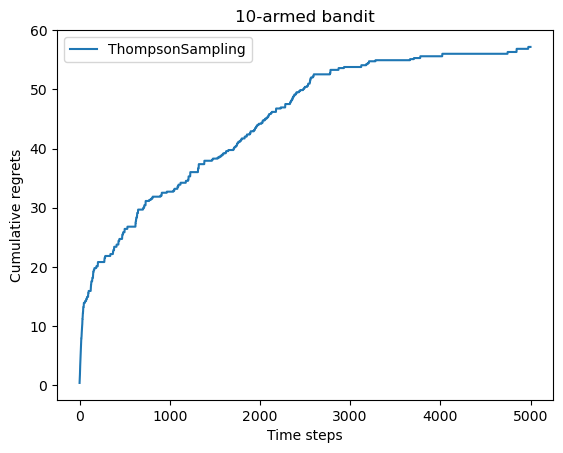

In [ ]:
class ThompsonSampling(Solver):
    """ 汤普森采样算法,继承Solver类 """
    def __init__(self, bandit):
        super(ThompsonSampling, self).__init__(bandit)
        self._a = np.ones(self.bandit.K)  # 初始化奖励为1的次数
        self._b = np.ones(self.bandit.K)  # 初始化奖励为0的次数

    def run_one_step(self):
        samples = np.random.beta(self._a, self._b)  # 按照Beta分布采样一组奖励样本
        k = np.argmax(samples)  # 选出采样奖励最大的拉杆
        r = self.bandit.step(k)

        self._a[k] += r  # 更新Beta分布的第一个参数
        self._b[k] += (1 - r)  # 更新Beta分布的第二个参数
        return k


np.random.seed(1)
thompson_sampling_solver = ThompsonSampling(bandit_10_arm)
thompson_sampling_solver.run(5000)
print('汤普森采样算法的累积懊悔为：', thompson_sampling_solver.regret)
plot_results([thompson_sampling_solver], ["ThompsonSampling"])

# 汤普森采样算法的累积懊悔为：57.19161964443925

通过上述的实验可以得到以下结论：$\epsilon$-贪婪算法的累积懊悔是随时间线性增长的，而另外的3种算法（$\epsilon$-衰减贪婪算法、上置信界算法、汤普森采样算法）的累积懊悔都是随时间次线性增长的（对数形式增长）。

## 3 总结
本次的实验先简要介绍了Gym库的一些函数和类，Gym库集成了非常多的强化学习环境，在后面的学习当中我们会陆续接触。接着我们学习了多臂老虎机的求解——强化学习中最基础的环境，学习如何利用不同的算法来平衡探索和利用。有兴趣的同学可以自行查阅下方的参考阅读，加深对算法的理解。

多臂老虎机问题与其他强化学习问题的一大区别在于其与环境的交互并不会改变环境本身，即多臂老虎机的每次交互的结果和以往的动作无关，所以可看作无状态的强化学习（stateless reinforcement learning）。下一次实验将在有状态的环境下讨论强化学习。

## 参考阅读

[动手学习强化学习](https://hrl.boyuai.com/)  （文档）

[官方Github](https://github.com/openai/gym) （代码仓库）

[官方教程文档](https://www.gymlibrary.dev/) （文档）  

[OpenAI GYM 入门 - 机器学习实验演示](https://www.bilibili.com/video/BV14e411K79h/?spm_id_from=333.337.search-card.all.click&vd_source=aa72e6092fb7465327f7bd8a8beb6e05) （视频）

[强化学习实战 第一讲 gym学习及二次开发](https://zhuanlan.zhihu.com/p/26985029) （文档）

[OpenAI Gym 介绍](https://zhuanlan.zhihu.com/p/448886425)（文档）

[Gym环境汇总](https://www.jianshu.com/p/e7235f8af25e) （文档）

[霍夫丁不等式推导](https://zhuanlan.zhihu.com/p/589652397) (文档)

[$\beta$分布公式推导](https://zhuanlan.zhihu.com/p/69606875)  （文档）